### Librairies


In [216]:
import pandas as pd
import pickle
# Imports widgets for user interface
from ipywidgets import widgets, Layout

# Imports Ipython displays for user interface
from IPython.display import display


# Dashboard

### Processing of Customers Data

#### Raw Data

This section will display the original dataset (raw data). 

In [217]:
raw_data = pd.read_csv("data/BankChurners.csv")
raw_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [218]:
print("The shape of the original dataset is {}. It contains {} rows (customers) and {} columns (features).".format(raw_data.shape, raw_data.shape[0], raw_data.shape[1]))

The shape of the original dataset is (10127, 23). It contains 10127 rows (customers) and 23 columns (features).


#### Modified Data

This section will display the dataset after the following operations have been made:
* Irrelevant columns were removed. 
* Columns have been renamed for consistency and better understanding.
* Target column (Attrition_Flag) was relocated to the end of the dataset for better visualization.

These actions were made to prepare the data to be analyzed.

In [219]:
modified_data = pd.read_csv("data/data_after_anomalies.csv", index_col=[0])
modified_data

,Age,Gender,Dependent_Count,Education,Marital_Status,Income,Card_Type,Months_On_Book,Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Revolving_Balance,Average_Open_Buy,Amount_Q4_Q1,Transaction_Amount,Transaction_Count,Count_Q4_Q1,Average_Usage_Ratio,Attrition_Flag
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,Existing Customer
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,Existing Customer
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,Existing Customer
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,Existing Customer
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,Existing Customer
10123,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,Attrited Customer
10124,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,Attrited Customer
10125,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,Attrited Customer


In [220]:
print("The shape of the dataset is now {}. It contains {} rows (customers) and {} columns (features).".format(modified_data.shape, modified_data.shape[0], modified_data.shape[1]))

The shape of the dataset is now (10127, 20). It contains 10127 rows (customers) and 20 columns (features).


## Data Analysis 

In [221]:
# Displays information about the dataset
modified_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  10127 non-null  int64  
 1   Gender               10127 non-null  object 
 2   Dependent_Count      10127 non-null  int64  
 3   Education            10127 non-null  object 
 4   Marital_Status       10127 non-null  object 
 5   Income               10127 non-null  object 
 6   Card_Type            10127 non-null  object 
 7   Months_On_Book       10127 non-null  int64  
 8   Relationship_Count   10127 non-null  int64  
 9   Months_Inactive      10127 non-null  int64  
 10  Contacts_Count       10127 non-null  int64  
 11  Credit_Limit         10127 non-null  float64
 12  Revolving_Balance    10127 non-null  int64  
 13  Average_Open_Buy     10127 non-null  float64
 14  Amount_Q4_Q1         10127 non-null  float64
 15  Transaction_Amount   10127 non-null 

In [222]:
# Displays statistics about the dataset
modified_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,10127.0,NaN,NaN,NaN,46.32596,8.016814,26.0,41.0,46.0,52.0,73.0
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_Count,10127.0,NaN,NaN,NaN,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
Education,10127,7,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,10127,4,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Type,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_On_Book,10127.0,NaN,NaN,NaN,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
Relationship_Count,10127.0,NaN,NaN,NaN,3.81258,1.554408,1.0,3.0,4.0,5.0,6.0
Months_Inactive,10127.0,NaN,NaN,NaN,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0


#### Categorical Features by Attrition Flag 

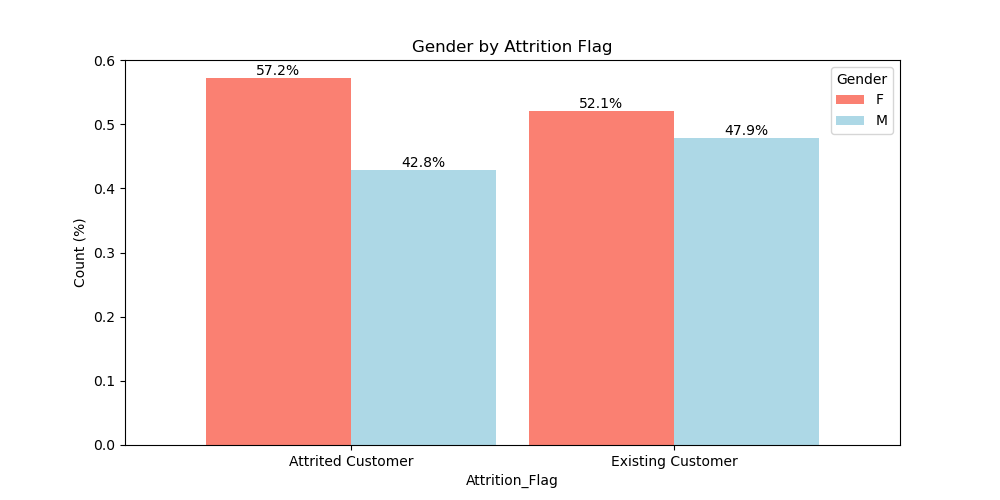

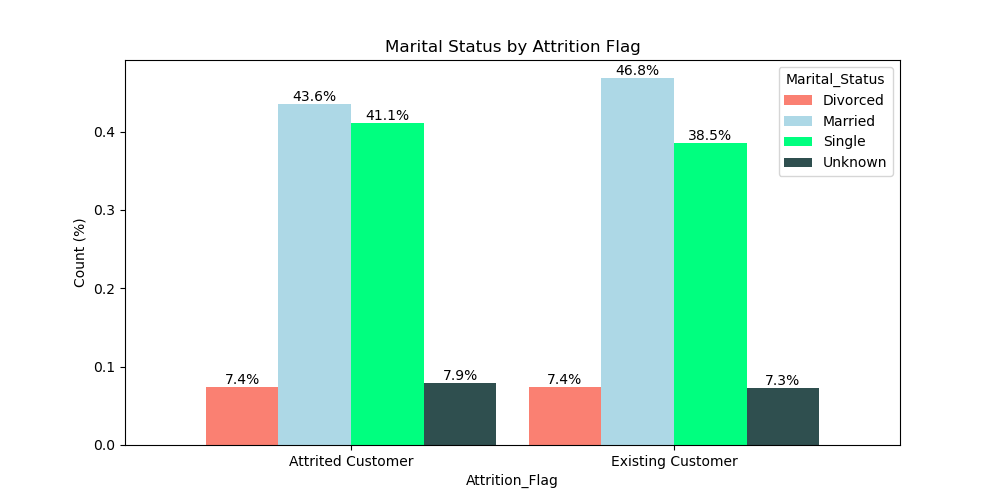

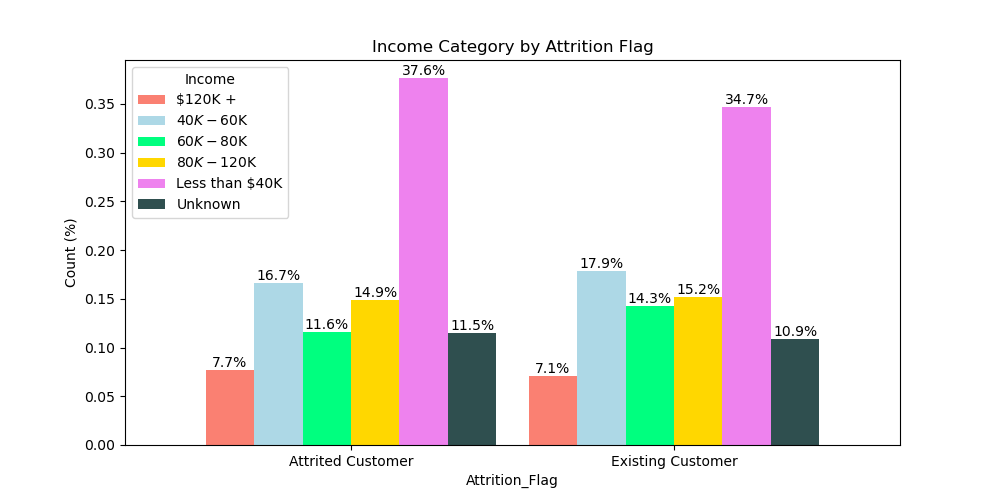

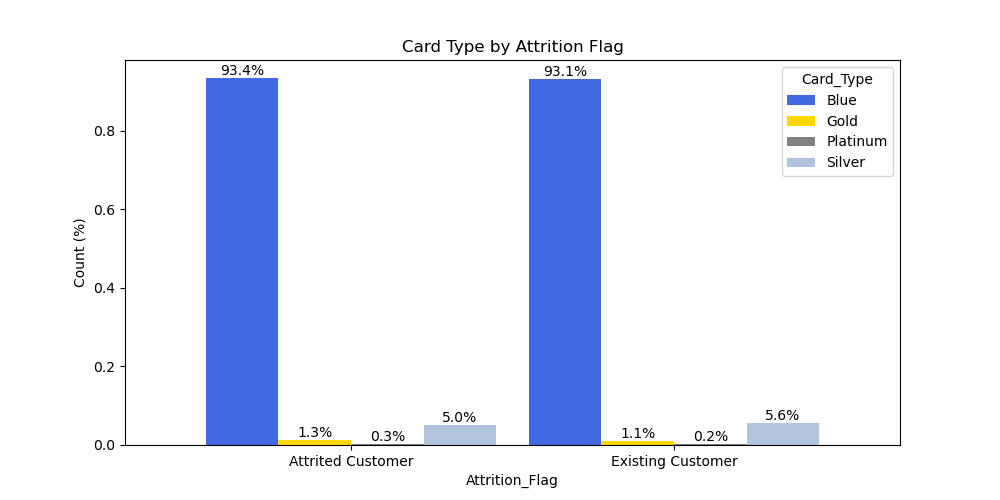

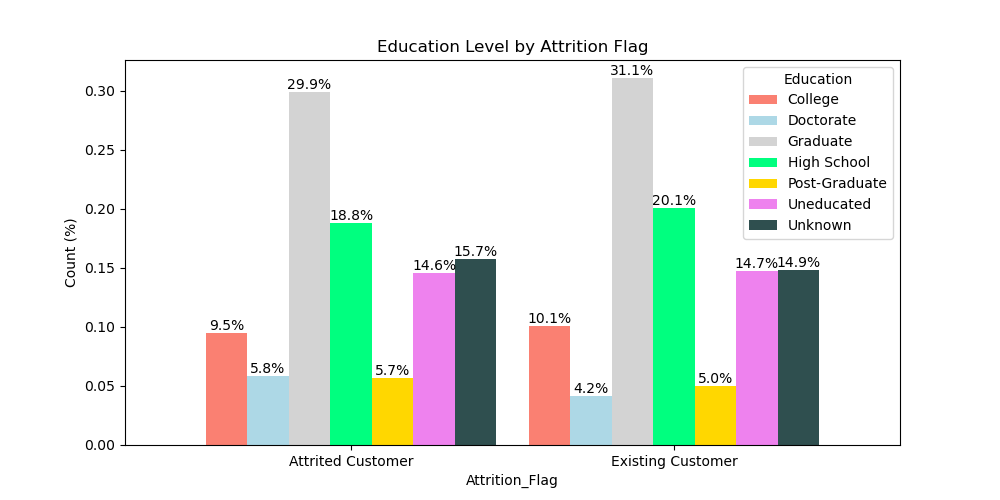

In [223]:
display(Image(filename="figures/gender-bar.png"),
        Image(filename="figures/marital-bar.png"),
        Image(filename="figures/income-bar.png"),
        Image(filename="figures/card-bar.png"),
        Image(filename="figures/education-bar.png"))
        

#### Customers Age Distribution

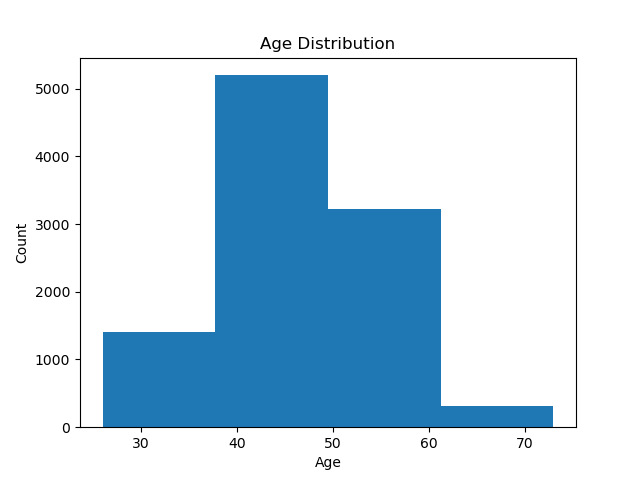

In [224]:
from IPython.display import Image
Image(filename="figures/age-distribution.png")

#### Age vs. Transaction & Change in Transaction Counts

0: Existing Customers
1: Attrited Customers


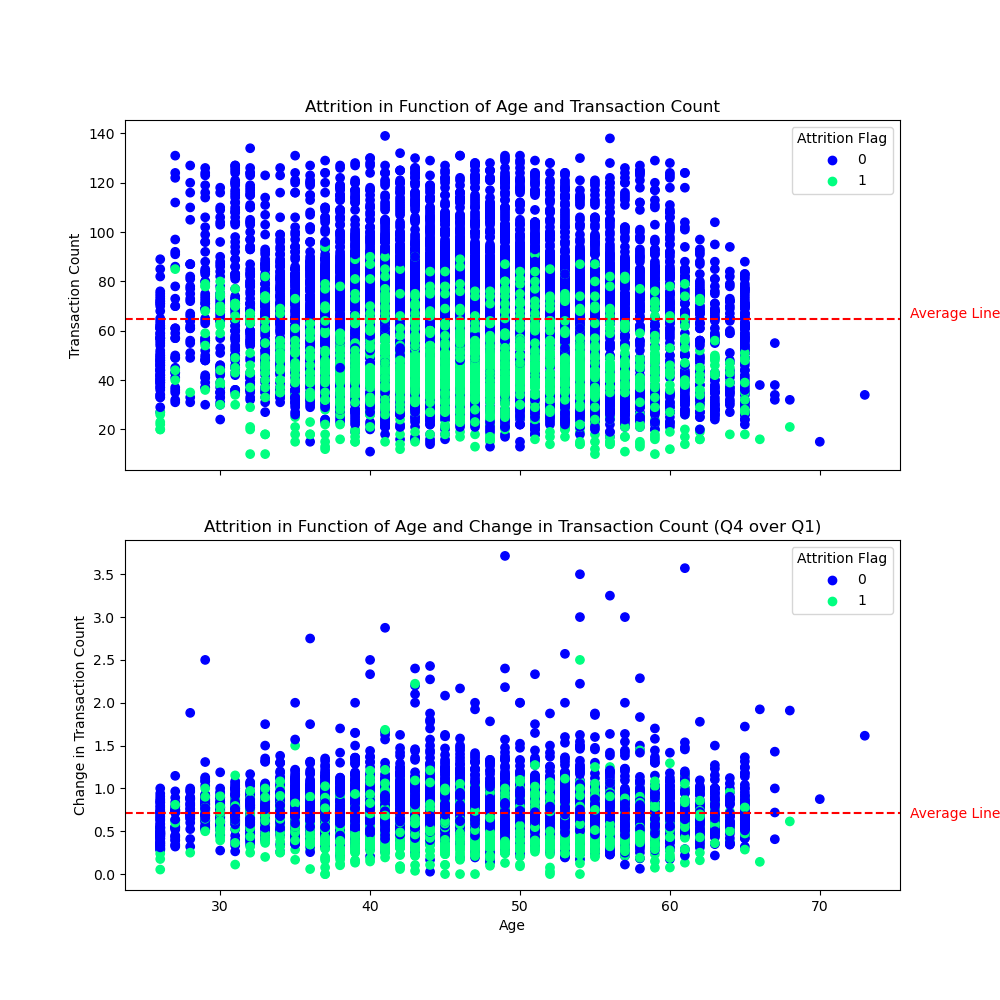

In [225]:
print("0: Existing Customers\n1: Attrited Customers")
Image(filename="figures/scatter1-transaction.png")

#### Transaction Amount, Credit Limit, Months Inactive, & Relationship Count vs. Transaction Count 

0: Existing Customers
1: Attrited Customers


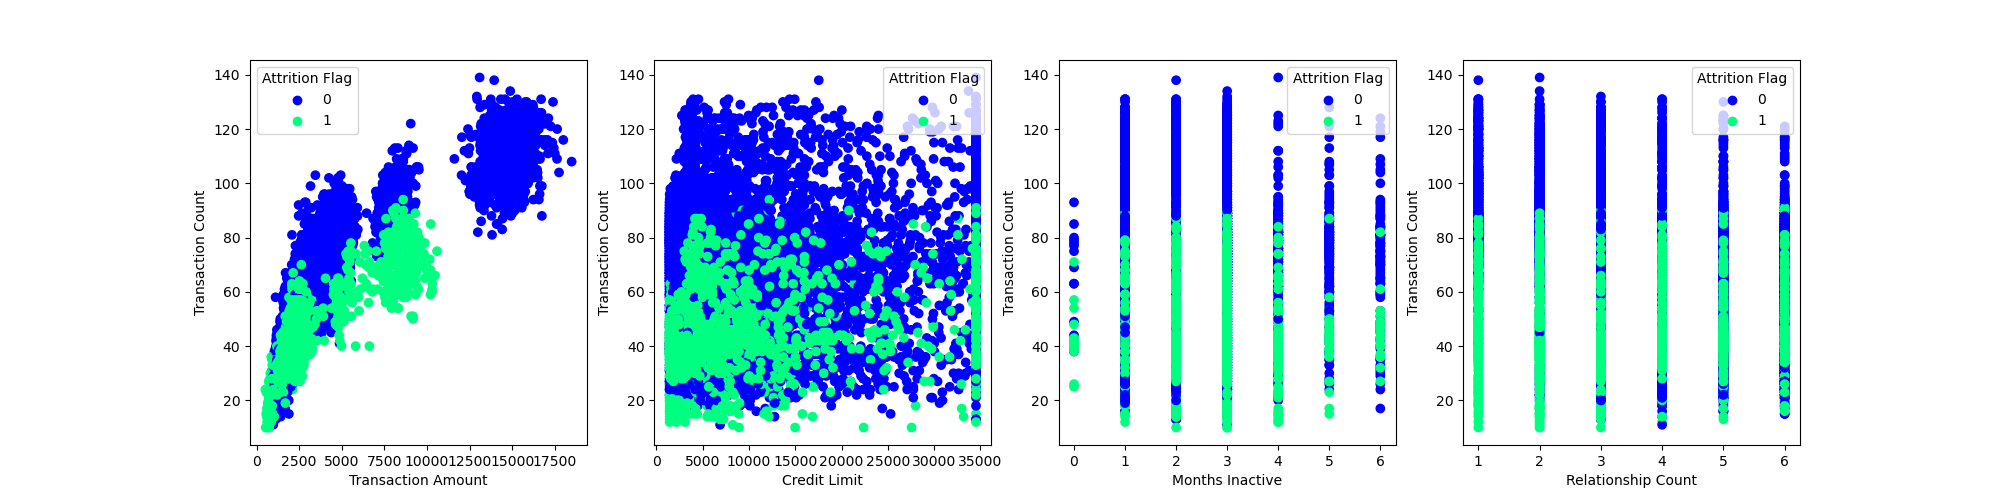

In [226]:
print("0: Existing Customers\n1: Attrited Customers")
Image(filename="figures/scatter2-transaction.png")

#### Credit Limit,  Average Open to Buy, & Revolving Balance vs. Average Usage Ratio

0: Existing Customers
1: Attrited Customers


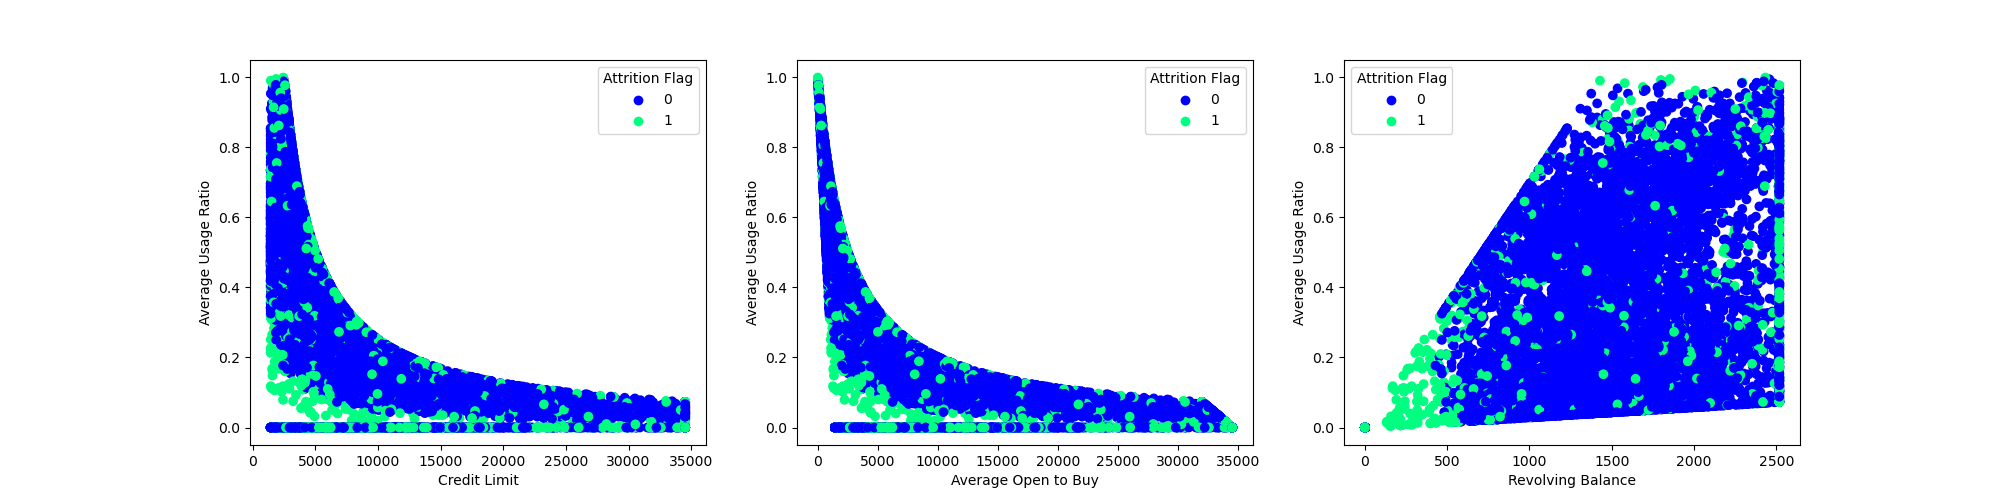

In [227]:
print("0: Existing Customers\n1: Attrited Customers")
Image(filename="figures/scatter3-avg-usage-ratio.png")

### Cleaned Data

This section will display the cleaned data, after going through the following preprocessing steps:

* Handling missing values: customers with "unknown" values were deleted from the `modified_data` dataset.
* Handling categorical variables: categorical features were transformed into numbers.

#### Cleaned Customers Data

In [228]:
cleaned_data = pd.read_csv("data/cleaned-data.csv",  index_col=[0])
cleaned_data

,Age,Gender,Dependent_Count,Education,Marital_Status,Income,Card_Type,Months_On_Book,Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Revolving_Balance,Average_Open_Buy,Amount_Q4_Q1,Transaction_Amount,Transaction_Count,Count_Q4_Q1,Average_Usage_Ratio,Attrition_Flag
0,45,0,3,1,2,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,49,1,5,3,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,51,0,3,3,2,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
4,40,0,3,0,2,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0
5,44,0,2,3,2,1,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,54,0,1,1,0,2,0,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,0
10121,56,1,1,3,0,0,0,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,0
10122,50,0,2,3,0,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0
10124,44,1,1,1,2,0,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1


In [229]:
print("The shape of the cleaned data is {}. It contains {} rows (customers) and {} columns (features).".format(cleaned_data.shape, cleaned_data.shape[0], cleaned_data.shape[1]))

The shape of the cleaned data is (7081, 20). It contains 7081 rows (customers) and 20 columns (features).


#### Correlation Matrix

Let's visualize the correlation between the customers attributes. 

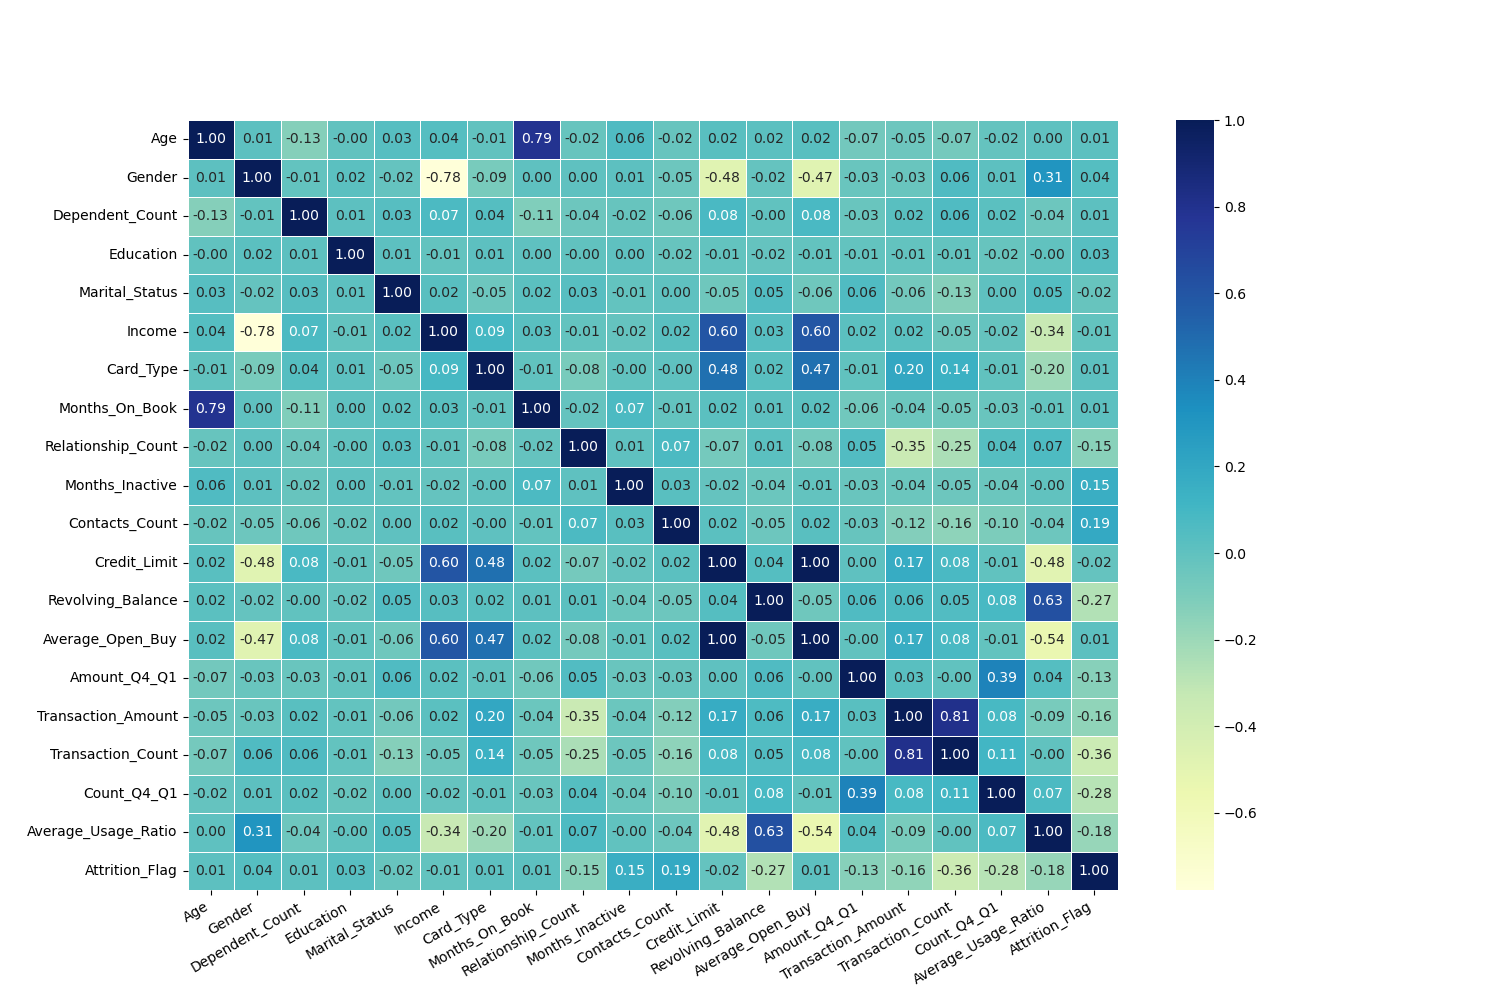

In [230]:
Image(filename="figures/correlation-matrix.png")

### The Model

The classification algorithm chosen to predict customer attrition is `XGBClassifer()`.

The choice of the algorithm was made by comparing the accuracy and classification report of different models, and `XGBClassifier()` gave the best results.

Then, the model was improved by tuning its hyperparameters with `GridSearchCV()`.




#### Load the Model & Make Predictions



In [231]:
# loads the model
loaded_model = pickle.load(open("final_model.pkl", "rb"))

# Loads the training and test datasets split into dependent (X) and independent (y) variables
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test

# Make predictions 
preds = loaded_model.predict(X_test)

### Accuracy Analysis

Here is a visualization of how the performance and accuracy of the model have been evaluated.

#### Classification Report

In [232]:
# Loads the classification report
%store -r class_report 

print("\033[1m" + "Classification Report of XGBoost Classifier" + "\033[0m" +"\n")
print(class_report)

Classification Report of XGBoost Classifier

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1205
           1       0.88      0.91      0.89       212

    accuracy                           0.97      1417
   macro avg       0.93      0.94      0.94      1417
weighted avg       0.97      0.97      0.97      1417



#### Evaluation Metrics Scores

In [233]:
# Loads the scores
%store -r acc_score
%store -r prec_score
%store -r rec_score
%store -r f_score

print("The model's evaluation metrics scores:")
print(f"Accuracy: {acc_score*100:.2f}%")
print(f"Precision: {prec_score*100:.2f}%")
print(f"Recall: {rec_score*100:.2f}%")
print(f"F1: {f_score*100:.2f}%")

The model's evaluation metrics scores:
Accuracy: 96.75%
Precision: 87.73%
Recall: 91.04%
F1: 89.35%


#### Confusion Matrix

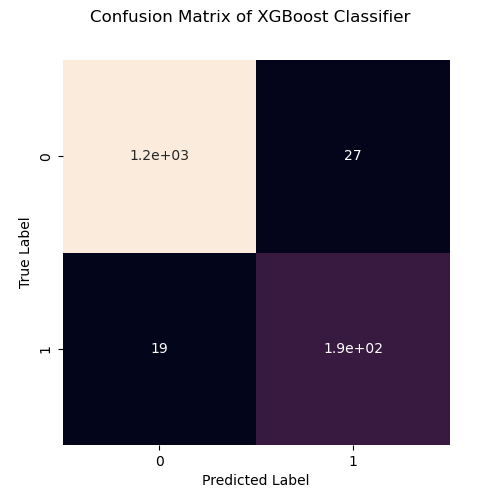

In [235]:
Image(filename="figures/confusion_matrix.png")

#### ROC Curve 

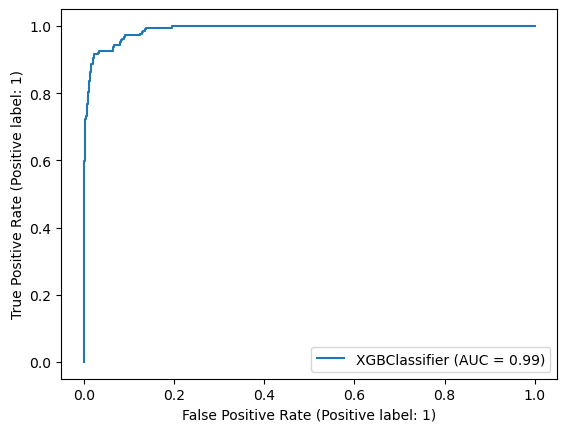

In [236]:
Image(filename="figures/roc-curve-display.png")

#### Cross-Validation


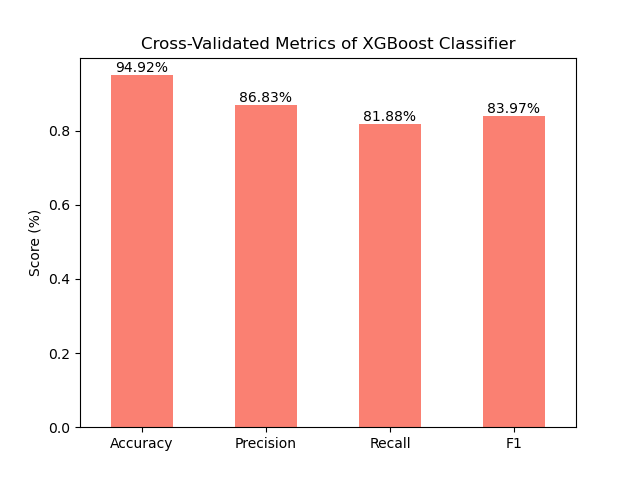

In [237]:
Image(filename="figures/cross-validated-graph.png")

# User Interface

#### Styles and Layouts

In [238]:
# predefines a style for inputs
style = {'description_width': 'initial'}

# predefines a layout for inputs
layout = Layout(width='99%')

# layout for the input_hbox, button_hbox, and instruction_hbox 
layout_hbox = Layout(justify_content='center')

# layout for the title_hbox and output_hbox
layout_title_output = Layout(justify_content='center',
                             border='solid 5px lightskyblue',
                             margin='10px 100px 10px 100px',
                             padding='5px 5px 5px 5px') 

#### Text Boxes and Drop Down Widgets

In [239]:
age_widget = widgets.BoundedIntText(description='Age:',
                             value=0,
                             min=0,
                             max=100,
                             step=1,
                             style=style,
                             layout=layout)

gender_widget = widgets.Dropdown(description='Gender:',
                                 options=[('Male', 0), ('Female', 1)],
                                 value=0,
                                 style=style,
                                 layout=layout)

dep_count_widget = widgets.BoundedIntText(description='Number of Dependents:',
                                          value=0,
                                          min=0,
                                          max=20,
                                          step=1,
                                          style=style,
                                          layout=layout)

education_widget = widgets.Dropdown(description='Education Level:',
                                    options=[('Uneducated', 0), ('High School', 1), ('College', 2), ('Graduate', 3),
                                             ('Post-Graduate', 4), ('Doctorate', 5)],
                                    value=0,
                                    style=style,
                                    layout=layout)

marital_widget = widgets.Dropdown(description='Marital Status:',
                                  options=[('Single', 0), ('Divorced', 1), ('Married', 2)],
                                  value=0,
                                  style=style,
                                  layout=layout)

income_widget = widgets.Dropdown(description='Income Category:',
                                 options=[('Less than $40K', 0),('$40K - $60K', 1), ('$60K - $80K', 2),
                                          ('$80K - $120K', 3), ('$120K +', 4)],
                                 value=0,
                                 style=style,
                                 layout=layout)

card_widget = widgets.Dropdown(description='Card Type:',
                               options=[('Blue', 0), ('Silver', 1), ('Gold', 2), ('Platinum', 3)],
                               value=0,
                               style=style,
                               layout=layout)

months_onbook_widget = widgets.BoundedIntText(description='Period of Relationship\n with the Bank (months):',
                                              value=0,
                                              min=0,
                                              max=1000,
                                              step=1,
                                              style=style,
                                              layout=layout)

relationship_count_widget = widgets.BoundedIntText(description='Total Number of Products with the Bank:',
                                                   value=0,
                                                   min=0,
                                                   max=100,
                                                   step=1,
                                                   style=style,
                                                   layout=layout)

months_inactive_widget = widgets.BoundedIntText(description='Number of Months Inactive (last 12 months)',
                                                value=0,
                                                min=0,
                                                max=12,
                                                step=1,
                                                style=style,
                                                layout=layout)

contacts_count_widget = widgets.IntText(description='Number of Contacts with the Bank (last 12 months):',
                                               value=0,
                                               style=style,
                                               layout=layout)

credit_lim_widget = widgets.FloatText(description='Credit Limit:',
                                             value=0.0,
                                             style=style,
                                             layout=layout)

rev_balance_widget = widgets.IntText(description='Total Revolving Balance on Credit Card:',
                                            value=0,
                                            style=style,
                                            layout=layout)

avg_openbuy_widget = widgets.FloatText(description='Average Open to Buy Credit Line (last 12 months):',
                                              value=0.0,
                                              style=style,
                                              layout=layout)

amt_Q4Q1_widget = widgets.FloatText(description='Change in Transaction Amount (Q4/Q1):',
                                           value=0.0,
                                           style=style,
                                           layout=layout)

trans_amt_widget = widgets.IntText(description='Total Transaction Amount (last 12 months):',
                                          value=0,
                                          style=style,
                                          layout=layout)

trans_count_widget = widgets.IntText(description='Total Transaction Count (last 12 months):',
                                            value=0,
                                            style=style,
                                            layout=layout)

count_Q4Q1_widget = widgets.FloatText(description='Change in Transaction Count (Q4/Q1):',
                                             value=0,
                                             style=style,
                                             layout=layout)

avg_usage_ratio_widget = widgets.FloatText(description='Average Card Utilization Ratio:',
                                                  value=0.000,
                                                  style=style,
                                                  layout=layout)

#### Labels

In [240]:
# Title label
label_title = widgets.Label(value="Customer Attrition Prediction")
label_title.style.font_size='30px'
label_title.style.font_weight = 'bold'

# Instruction label
label_instruction = widgets.Label(value='Enter values in text boxes and press the \"Predict\" button to generate a prediction on customer attrition.')
label_instruction.style.font_size = '16px'
label_instruction.style.font_style = 'italic'

# Output label
label_output = widgets.Label(value='Prediction')
label_output.style.font_size='20px'
label_output.style.font_weight = 'bold'

#### Buttons

In [241]:
# 'Predict' button
button_prediction = widgets.Button(description='Predict', layout=Layout(width='200px', height='30px', border='solid 2px black'))
button_prediction.style.font_weight = '600'
button_prediction.style.font_size = '16px'

#### HBox and VBox

In [242]:
# Inserts the title into an HBox
title_hbox = widgets.HBox([label_title], layout=layout_title_output)

# Inserts the instruction into an HBox
instruction_hbox = widgets.HBox([label_instruction],layout=layout_hbox)

# Inserts textboxes and dropdowns (inputs) into a VBox
input_vbox = widgets.VBox([age_widget, gender_widget, dep_count_widget, education_widget, marital_widget, income_widget, card_widget,
                          months_onbook_widget, relationship_count_widget, months_inactive_widget, contacts_count_widget, credit_lim_widget,
                          rev_balance_widget, avg_openbuy_widget, amt_Q4Q1_widget,
                          trans_amt_widget, trans_count_widget, count_Q4Q1_widget, avg_usage_ratio_widget],
                          layout=Layout(flex_flow='column'))


# Inserts the input_vbox into an HBox to display its content in the center 
input_hbox = widgets.HBox([input_vbox], layout=layout_hbox)

# Inserts the 'predict' button into an HBox
pred_button_hbox = widgets.HBox([button_prediction],layout=layout_hbox)

# Inserts the output into an HBox
output_hbox = widgets.HBox([label_output], layout = layout_title_output)

#### Events

In [243]:
def on_click_predict(action):
    df_predict = pd.DataFrame([[age_widget.value, gender_widget.value, dep_count_widget.value, education_widget.value, marital_widget.value, income_widget.value, card_widget.value,
                                months_onbook_widget.value, relationship_count_widget.value, months_inactive_widget.value, contacts_count_widget.value, credit_lim_widget.value,
                                rev_balance_widget.value, avg_openbuy_widget.value, amt_Q4Q1_widget.value, trans_amt_widget.value, trans_count_widget.value, count_Q4Q1_widget.value,
                                avg_usage_ratio_widget.value]], columns=loaded_model.feature_names_in_)
    prediction = loaded_model.predict(df_predict)
    if prediction[0] == 0:  
        label_output.value = 'Existing Customer'
        
    if prediction[0] ==1:
        label_output.value= 'Attrited Customer'
    
button_prediction.on_click(on_click_predict)


In [244]:
# Displays the HBoxes 
display(title_hbox)
display(instruction_hbox)
display(input_hbox)
display(pred_button_hbox)
display(output_hbox)


In [245]:
!pip freeze > requirements.txt